## Importing libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Reading the csv File 

In [2]:
 df=pd.read_csv("Covid19_July1-July 7th.csv")

In [3]:
df

Entry_ID State Patient Number Date Announced  Age Bracket Gender  \
0         94849                  NaN     01/07/2020          NaN    NaN   
1         94850                  NaN     01/07/2020          NaN    NaN   
2         94851                  NaN     01/07/2020          NaN    NaN   
3         94852                  NaN     01/07/2020          NaN    NaN   
4         94853                  NaN     01/07/2020          NaN    NaN   
...         ...                  ...            ...          ...    ...   
22790    117831                  NaN     07/07/2020          NaN    NaN   
22791    118420                  NaN     07/07/2020          NaN    NaN   
22792    118421                  NaN     07/07/2020          NaN    NaN   
22793    121323                  NaN     07/07/2020          NaN    NaN   
22794    121324                  NaN     07/07/2020          NaN    NaN   

      Detected City       Detected District  \
0               NaN              Unassigned   
1               NaN                     NaN   
2               NaN                   Angul   
3               NaN                Balasore   
4               NaN                 Bargarh   
...             ...                     ...   
22790           NaN  Dadra and Nagar Haveli   
22791           NaN                     NaN   
22792           NaN                     NaN   
22793           NaN               Kozhikode   
22794           NaN                 Wayanad   

                                 Detected State State code  Num Cases  \
0                              State Unassigned         UN        -89   
1                                      Nagaland         NL         21   
2                                        Odisha         OR          1   
3                                        Odisha         OR          2   
4                                        Odisha         OR         12   
...                                         ...        ...        ...   
22790  Dadra and Nagar Haveli and Daman and Diu         DN          2   
22791                                    Sikkim         SK         -9   
22792                                    Sikkim         SK         -6   
22793                                    Kerala         KL         -1   
22794                                    Kerala         KL          1   

      Current Status  Contracted from which Patient (Suspected)  \
0       Hospitalized                                        NaN   
1       Hospitalized                                        NaN   
2       Hospitalized                                        NaN   
3       Hospitalized                                        NaN   
4       Hospitalized                                        NaN   
...              ...                                        ...   
22790   Hospitalized                                        NaN   
22791      Recovered                                        NaN   
22792      Recovered                                        NaN   
22793      Recovered                                        NaN   
22794      Recovered                                        NaN   

                                                   Notes  \
0                                                    NaN   
1      10 from Peren QC, 8 from Phek QC , 2 from Kohi...   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
22790                                                NaN   
22791                                                NaN   
22792                                                NaN   
22793                                                NaN   
22794                                                NaN   

                                                Source_1 Source_2  Source_3  \
0                              https://www.mohfw.gov.in/   

## Inspecting the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22795 entries, 0 to 22794
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entry_ID                                   22795 non-null  int64  
 1   State Patient Number                       14924 non-null  object 
 2   Date Announced                             22795 non-null  object 
 3   Age Bracket                                12538 non-null  float64
 4   Gender                                     12583 non-null  object 
 5   Detected City                              772 non-null    object 
 6   Detected District                          22556 non-null  object 
 7   Detected State                             22795 non-null  object 
 8   State code                                 22795 non-null  object 
 9   Num Cases                                  22795 non-null  int64  
 10  Current Status        

## Inspecting null values in each columns

In [5]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Patient Number                               100.000000
Status Change Date                           100.000000
Type of transmission                         100.000000
Nationality                                  100.000000
Source_3                                     100.000000
Contracted from which Patient (Suspected)    100.000000
Source_2                                      99.574468
Detected City                                 96.613292
Notes                                         45.567010
Age Bracket                                   44.996710
Gender                                        44.799298
State Patient Number                          34.529502
Detected District                              1.048476
Source_1                                       0.776486
Entry_ID                                       0.000000
Num Cases                                      0.000000
State code                                     0.000000
Detected State                                 0

## Inspecting null values in rows 

In [6]:
df.isnull().sum(axis=1).sort_values(ascending=False)


12453    14
8790     14
8789     14
16725    13
16796    13
         ..
11557     8
11558     8
11559     8
11397     8
19383     7
Length: 22795, dtype: int64

In [7]:
df_nonHosp=df[df['Current Status']=="Hospitalized"]

## Total number of cases on average per day 

In [8]:
D=df_nonHosp.groupby('Date Announced')['Num Cases'].sum()
D

Date Announced
01/07/2020    19429
02/07/2020    21947
03/07/2020    22718
04/07/2020    24018
05/07/2020    23942
06/07/2020    22500
07/07/2020    23147
11/06/2020        0
12/06/2020        0
13/06/2020        0
14/06/2020        0
15/06/2020        0
16/06/2020        0
17/06/2020        0
19/06/2020        0
20/06/2020        0
21/06/2020        0
22/06/2020        0
23/06/2020        0
25/06/2020        0
26/06/2020        0
28/06/2020        0
29/06/2020        0
30/06/2020        0
Name: Num Cases, dtype: int64

<AxesSubplot:xlabel='Date Announced'>

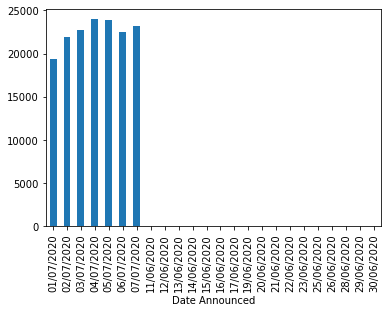

In [9]:
D.plot.bar()

## Total Number of Male/Female Affected percent vise

In [10]:
df_nonHosp.groupby('Gender')['Num Cases'].sum()/len(df[df['Current Status']=="Hospitalized"])*100

Gender
F             27.064020
M             49.916008
Non-Binary     0.031108
Name: Num Cases, dtype: float64

#### This shows that 50 % of the people affected with the corona virus are men 

## Which age group is mostly affected

In [11]:
df_nonHosp.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)

Age Bracket
30.0    393
28.0    362
40.0    355
32.0    354
35.0    346
45.0    344
26.0    300
27.0    292
50.0    291
25.0    290
Name: Num Cases, dtype: int64

<AxesSubplot:xlabel='Age Bracket'>

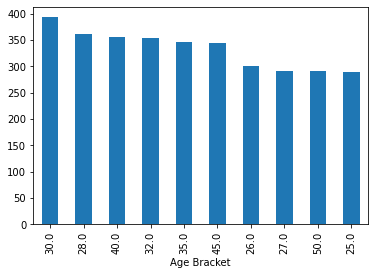

In [12]:
df_nonHosp.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10).plot.bar()

#### This concludes that the age affected the most rely between 25 to 50 

## Total cases state vise

<AxesSubplot:xlabel='Detected State'>

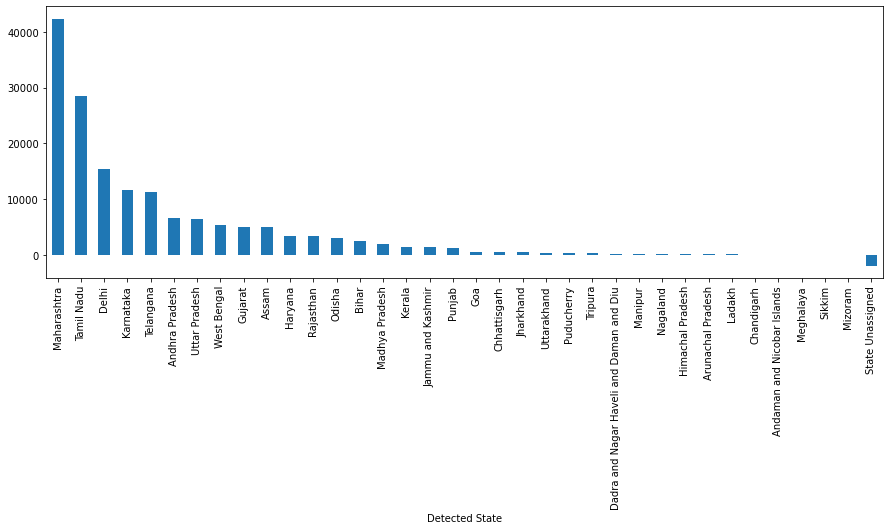

In [13]:
df_nonHosp.groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).plot.bar(figsize=(15,5))

#### This shows that Maharashtra is the state that has mostly been affected

## Number of people deceased 

In [14]:
df['Num Cases'][df['Current Status']=='Deceased'].sum()

3243

## Number of People Deceased per state

In [15]:
df[df['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)

Detected State
Maharashtra                                 1395
Tamil Nadu                                   435
Delhi                                        423
Karnataka                                    171
West Bengal                                  136
Uttar Pradesh                                130
Gujarat                                      130
Andhra Pradesh                                65
Rajasthan                                     59
Telangana                                     53
Madhya Pradesh                                50
Haryana                                       43
Jammu and Kashmir                             42
Punjab                                        31
Bihar                                         30
Odisha                                        22
Jharkhand                                      7
Goa                                            5
Assam                                          4
Kerala                                         3
Puduc

<AxesSubplot:xlabel='Detected State'>

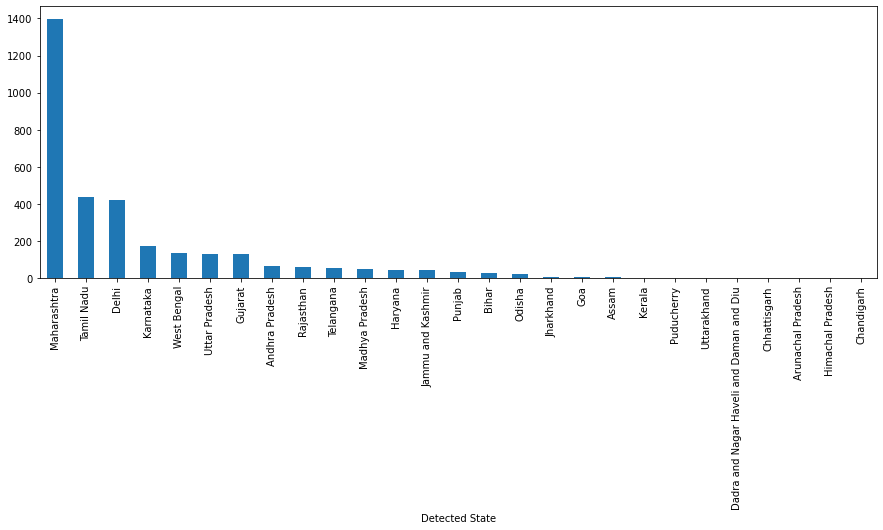

In [16]:
df[df['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False).plot.bar(figsize=(15,5))

#### With this we can conclude that most of the deaths has been in Maharashtra